# Stage 1. Understanding The Problem
Predict housing value from historic data with over 80 independent variables. 

# Stage 2. Data ingestion/loading 

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Try loading from the same folder as the notebook first
try:
    data = pd.read_csv("house_prices.csv")
except FileNotFoundError:
    # If your file is elsewhere, update this path
    data = pd.read_csv(r"C:\path\to\your\house_prices.csv")

data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


After exploring data it is now time to clear data. This includes: Deal with missing data, outliers, deal with corrolated features, handel text and categorical features,and feature scaling 

# Stage 3. Data evaluation and  exploration

In [11]:
# fine the number of rows and columns
data.shape  

(545, 13)

In [13]:
# List a few observations from the top
data.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [15]:
# list the name of features, how many features?
data.columns # list of 81 features ( column labels)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Use dtype to distinguish between numerical and catagorical features.
Use describe() function to examine statistical values of numerical features.It shows a summary of numerial features, which can be visualized using boxplots and histograms.
The descibe() function ignors the null values when computing statistical values.

In [5]:
data.select_dtypes(exclude=['object']).describe().round(decimals=2).transpose() # use transpose for an easier viewing

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.50,421.61,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.90,42.30,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.05,24.28,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.83,9981.26,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.10,1.38,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.58,1.11,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.27,30.20,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.87,20.65,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.69,181.07,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.64,456.10,0.0,0.00,383.5,712.25,5644.0


In [21]:
data.columns = data.columns.str.strip()

if "SalePrice" in data.columns:
    data.boxplot(column=["SalePrice"], figsize=(5, 5))
else:
    print("SalePrice column not found. Available columns are:")
    print(data.columns)


SalePrice column not found. Available columns are:
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [23]:
# histogram
data.hist(bins=50, figsize=(15, 15))

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

In [25]:
data.info() # many of the columns have missing values. 
# a quick way to get data types and non-null values. Row 6 has only 91 non-null values out of 1460

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


<ul><li>
total observations: 1460: make sure you understand what is each observation. In this case, each observation is the data about a house feature</li>
    <li>total columns (features): 81</li>
    <li>Observe the data type of each feature</li>
   <li> meaning of each feature: it is very important to work with domain expert to fully understand each feature</li>
    <li>any null values (e.g., LotFrontage is 1201, which indicates null values - will handle later</li>
  </ul>

In [27]:

# Number of columns for each data type. value_counts() can be used to generate a summary of categorical features.
data.dtypes.value_counts()

object    7
int64     6
Name: count, dtype: int64

In [31]:
data.columns = data.columns.str.strip()

if "RoofStyle" in data.columns:
    print(data["RoofStyle"].value_counts())
else:
    print("RoofStyle column not found.")
    print("Available categorical columns are:")
    print(data.select_dtypes(include="object").columns)


RoofStyle column not found.
Available categorical columns are:
Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


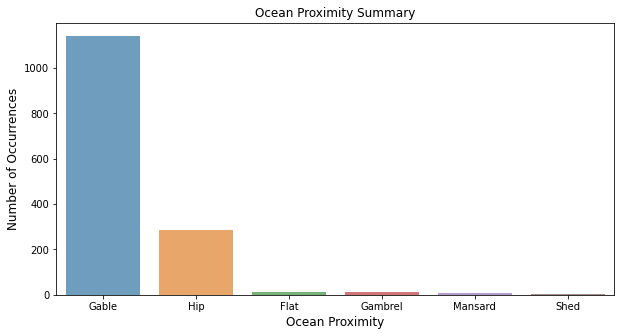

In [11]:
op_count = data['RoofStyle'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=op_count.index,y= op_count.values, alpha=0.7)
plt.title('Ocean Proximity Summary')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Ocean Proximity', fontsize=12)
plt.show()
#data['RoofStyle'].value_counts().hist()

Let's examine the categorical features. We can get the number of unique values and the count for the top value. We also get the count of non-null values.

In [33]:
data.select_dtypes(include=['object']).describe().transpose()

,count,unique,top,freq
mainroad,545,2,yes,468
guestroom,545,2,no,448
basement,545,2,no,354
hotwaterheating,545,2,no,520
airconditioning,545,2,no,373
prefarea,545,2,no,417
furnishingstatus,545,3,semi-furnished,227


In [35]:
# Another way to get unique values for each type of data
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

mainroad            2
guestroom           2
basement            2
hotwaterheating     2
airconditioning     2
prefarea            2
furnishingstatus    3
dtype: int64

In [37]:
cat=data.select_dtypes('object')
for x in cat:
    print('{} = {}'.format(x, data[x].unique()))

mainroad = ['yes' 'no']
guestroom = ['no' 'yes']
basement = ['no' 'yes']
hotwaterheating = ['no' 'yes']
airconditioning = ['yes' 'no']
prefarea = ['yes' 'no']
furnishingstatus = ['furnished' 'semi-furnished' 'unfurnished']


In [39]:
#number of unique values in each feature
data.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

list columns in a decreasing order of number of missing values.<br>
The to_string() is used to display all the rows.
   

In [41]:
print(data.isnull().sum().sort_values(ascending=False).to_string())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0


we can assume that PoolQC to Bsmt attributes are missing from the houses (houses without pools, basements, garage etc.). Therefore, the missing values could be filled with “None”, meaning that the houses don't have the missing values.

In [43]:
fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                     'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                     'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond',
                     'MasVnrType']

In [47]:
# Make column names consistent (removes hidden spaces)
data.columns = data.columns.str.strip()

# Keep only the columns that actually exist in this dataset
fill_none_existing = [c for c in fill_none if c in data.columns]

# If none exist, show a helpful message
if len(fill_none_existing) == 0:
    print("None of the columns in fill_none exist in this dataset.")
    print("These are the available categorical columns:")
    print(list(data.select_dtypes(include="object").columns))
else:
    data[fill_none_existing] = data[fill_none_existing].fillna("None")
    print("Filled missing values with 'None' for:", fill_none_existing)


None of the columns in fill_none exist in this dataset.
These are the available categorical columns:
['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


For LotFrontage, we are going to compute the median LotFrontage for all the houses in the same neighborhood, instead of the plain median for the entire column, and use that to impute on a neighborhood by neighborhood basis. Note that there are 25 Neighborhoods

In [51]:
# Clean column names (handles hidden spaces)
data.columns = data.columns.str.strip()

# Ames-specific fill: LotFrontage grouped by Neighborhood
if ("LotFrontage" in data.columns) and ("Neighborhood" in data.columns):
    data["LotFrontage"] = data["LotFrontage"].fillna(
        data.groupby("Neighborhood")["LotFrontage"].transform("median")
    )
    print("Filled LotFrontage using Neighborhood median.")
    
# If LotFrontage exists but Neighborhood does not, use overall median
elif "LotFrontage" in data.columns:
    data["LotFrontage"] = data["LotFrontage"].fillna(data["LotFrontage"].median())
    print("Filled LotFrontage using overall median (Neighborhood not found).")

# If LotFrontage doesn't exist at all, show what numeric columns exist
else:
    print("LotFrontage column not found in this dataset.")
    print("Example numeric columns available:")
    print(list(data.select_dtypes(include="number").columns)[:25])


LotFrontage column not found in this dataset.
Example numeric columns available:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [20]:
#Above command can also be done as follows using lamda function
#data['LotFrontage'] = data.groupby("Neighborhood")["LotFrontage"].transform(
 #   lambda x: x.fillna(x.median()))  

In [53]:
print(data)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

We are going to replace missing values for most of the numerical columns with zero, one and  the mode of the feature.

In [131]:
num_cols = data.select_dtypes(include='number').columns

for col in num_cols:
    data[col] = data[col].fillna(data[col].median())

print("Numeric missing values handled.")


Numeric missing values handled.


In [137]:
cat_cols = data.select_dtypes(include='object').columns
data[cat_cols] = data[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

print("Categorical missing values handled.")


Categorical missing values handled.


No need for the feature "Utilities"

In [145]:
data.columns = data.columns.str.strip()

if "Utilities" in data.columns:
    data = data.drop(["Utilities"], axis=1)
    print("Dropped Utilities.")
else:
    print("Utilities column not found — nothing to drop.")


Utilities column not found — nothing to drop.


In [147]:
# Get the count again to verify that we do not have any more missing values
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In this example we will try to predict the price of a house based on selected features.</br>
Start by looking into the distribution of each feature using the displot() function in seaborn package

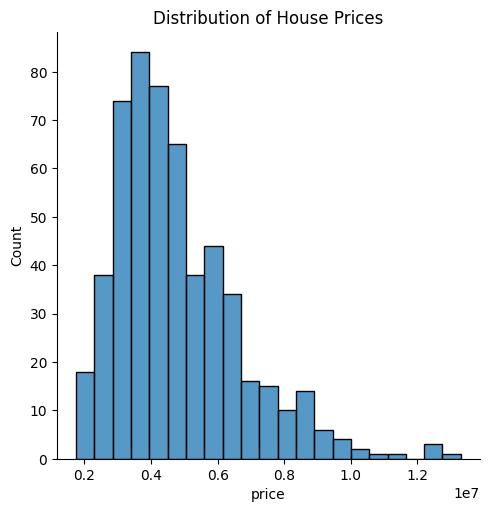

In [115]:
sns.displot(data["price"])
plt.title("Distribution of House Prices")
plt.show()


informations on the target

SalePrice not found. Using parking instead.


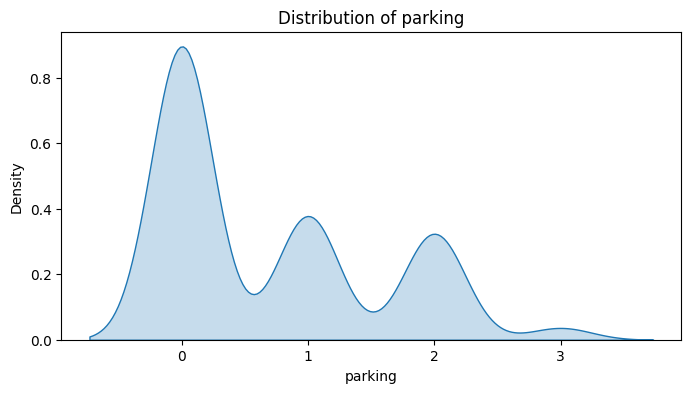

In [149]:
plt.figure(figsize=(8, 4))

# Clean column names
data.columns = data.columns.str.strip()

# Select correct target column
if "SalePrice" in data.columns:
    target_col = "SalePrice"
elif "median_house_value" in data.columns:
    target_col = "median_house_value"
else:
    # fallback to last numeric column
    target_col = data.select_dtypes(include="number").columns[-1]
    print(f"SalePrice not found. Using {target_col} instead.")

sns.kdeplot(data[target_col], fill=True)
plt.title(f"Distribution of {target_col}")
plt.show()


In [151]:
# Clean column names
data.columns = data.columns.str.strip()

# Select correct target column
if "SalePrice" in data.columns:
    target_col = "SalePrice"
elif "median_house_value" in data.columns:
    target_col = "median_house_value"
else:
    # fallback to numeric column
    target_col = data.select_dtypes(include="number").columns[-1]
    print(f"SalePrice not found. Using {target_col} instead.")

# Describe target column
data[target_col].describe()


SalePrice not found. Using parking instead.


count    545.000000
mean       0.693578
std        0.861586
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: parking, dtype: float64

Let's plot the distribution for all the features. But before that we can drop the "id" feature and the "SalePrice" feature

In [153]:
# Clean column names
data.columns = data.columns.str.strip()

# Keep only numeric columns
data2 = data.select_dtypes(exclude=["object"]).copy()

# Drop columns only if they exist
cols_to_drop = [c for c in ["Id", "SalePrice", "median_house_value"] if c in data2.columns]
data2 = data2.drop(cols_to_drop, axis=1)

data2.head()


,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [155]:
type(data2)

pandas.core.frame.DataFrame

In [157]:
len(data2.transpose())  # there are now 36 features that can be plotted in a 9 X 4 array of subplots

6

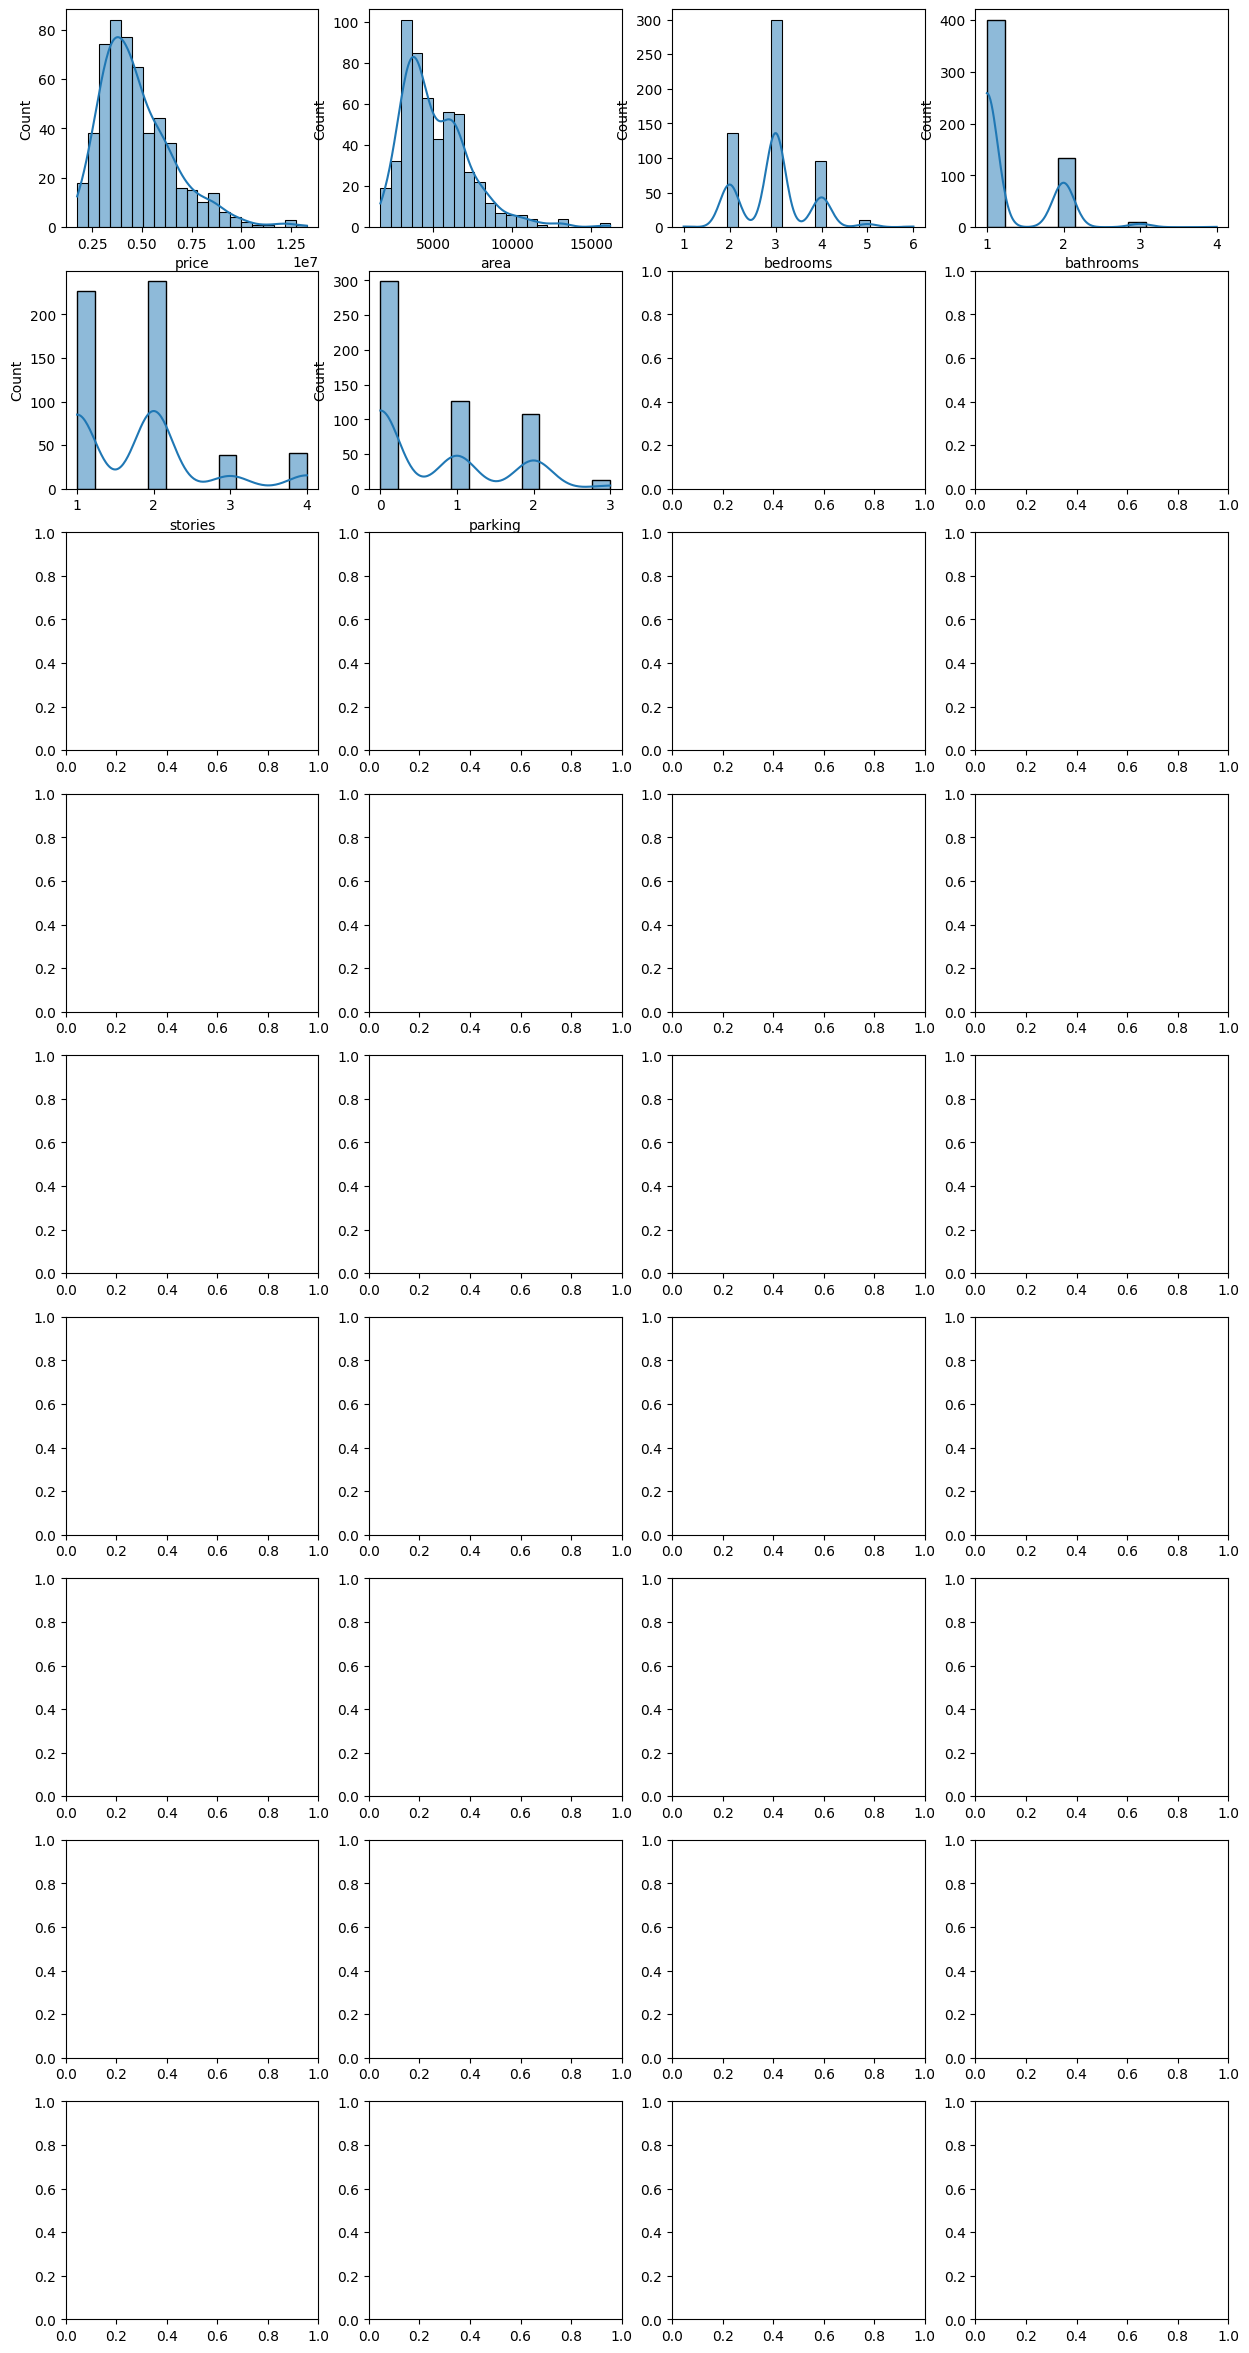

In [159]:
# select the columns to be plotted
cols = data2.columns

# create the figure and axes
fig, axes = plt.subplots(9, 4)
fig.set_size_inches(15, 30)  # ( x , y )
axes = axes.ravel()  # flattening the array makes indexing easier
for col, ax in zip(cols, axes):
    sns.histplot(data=data2[col], kde=True, ax = ax)

plt.show()

Notice the range of values for the different variables, this is the reason we need to do feature scaling before we can use these features for modeling. 

Next we will use the the boxplot to identify the outiers.

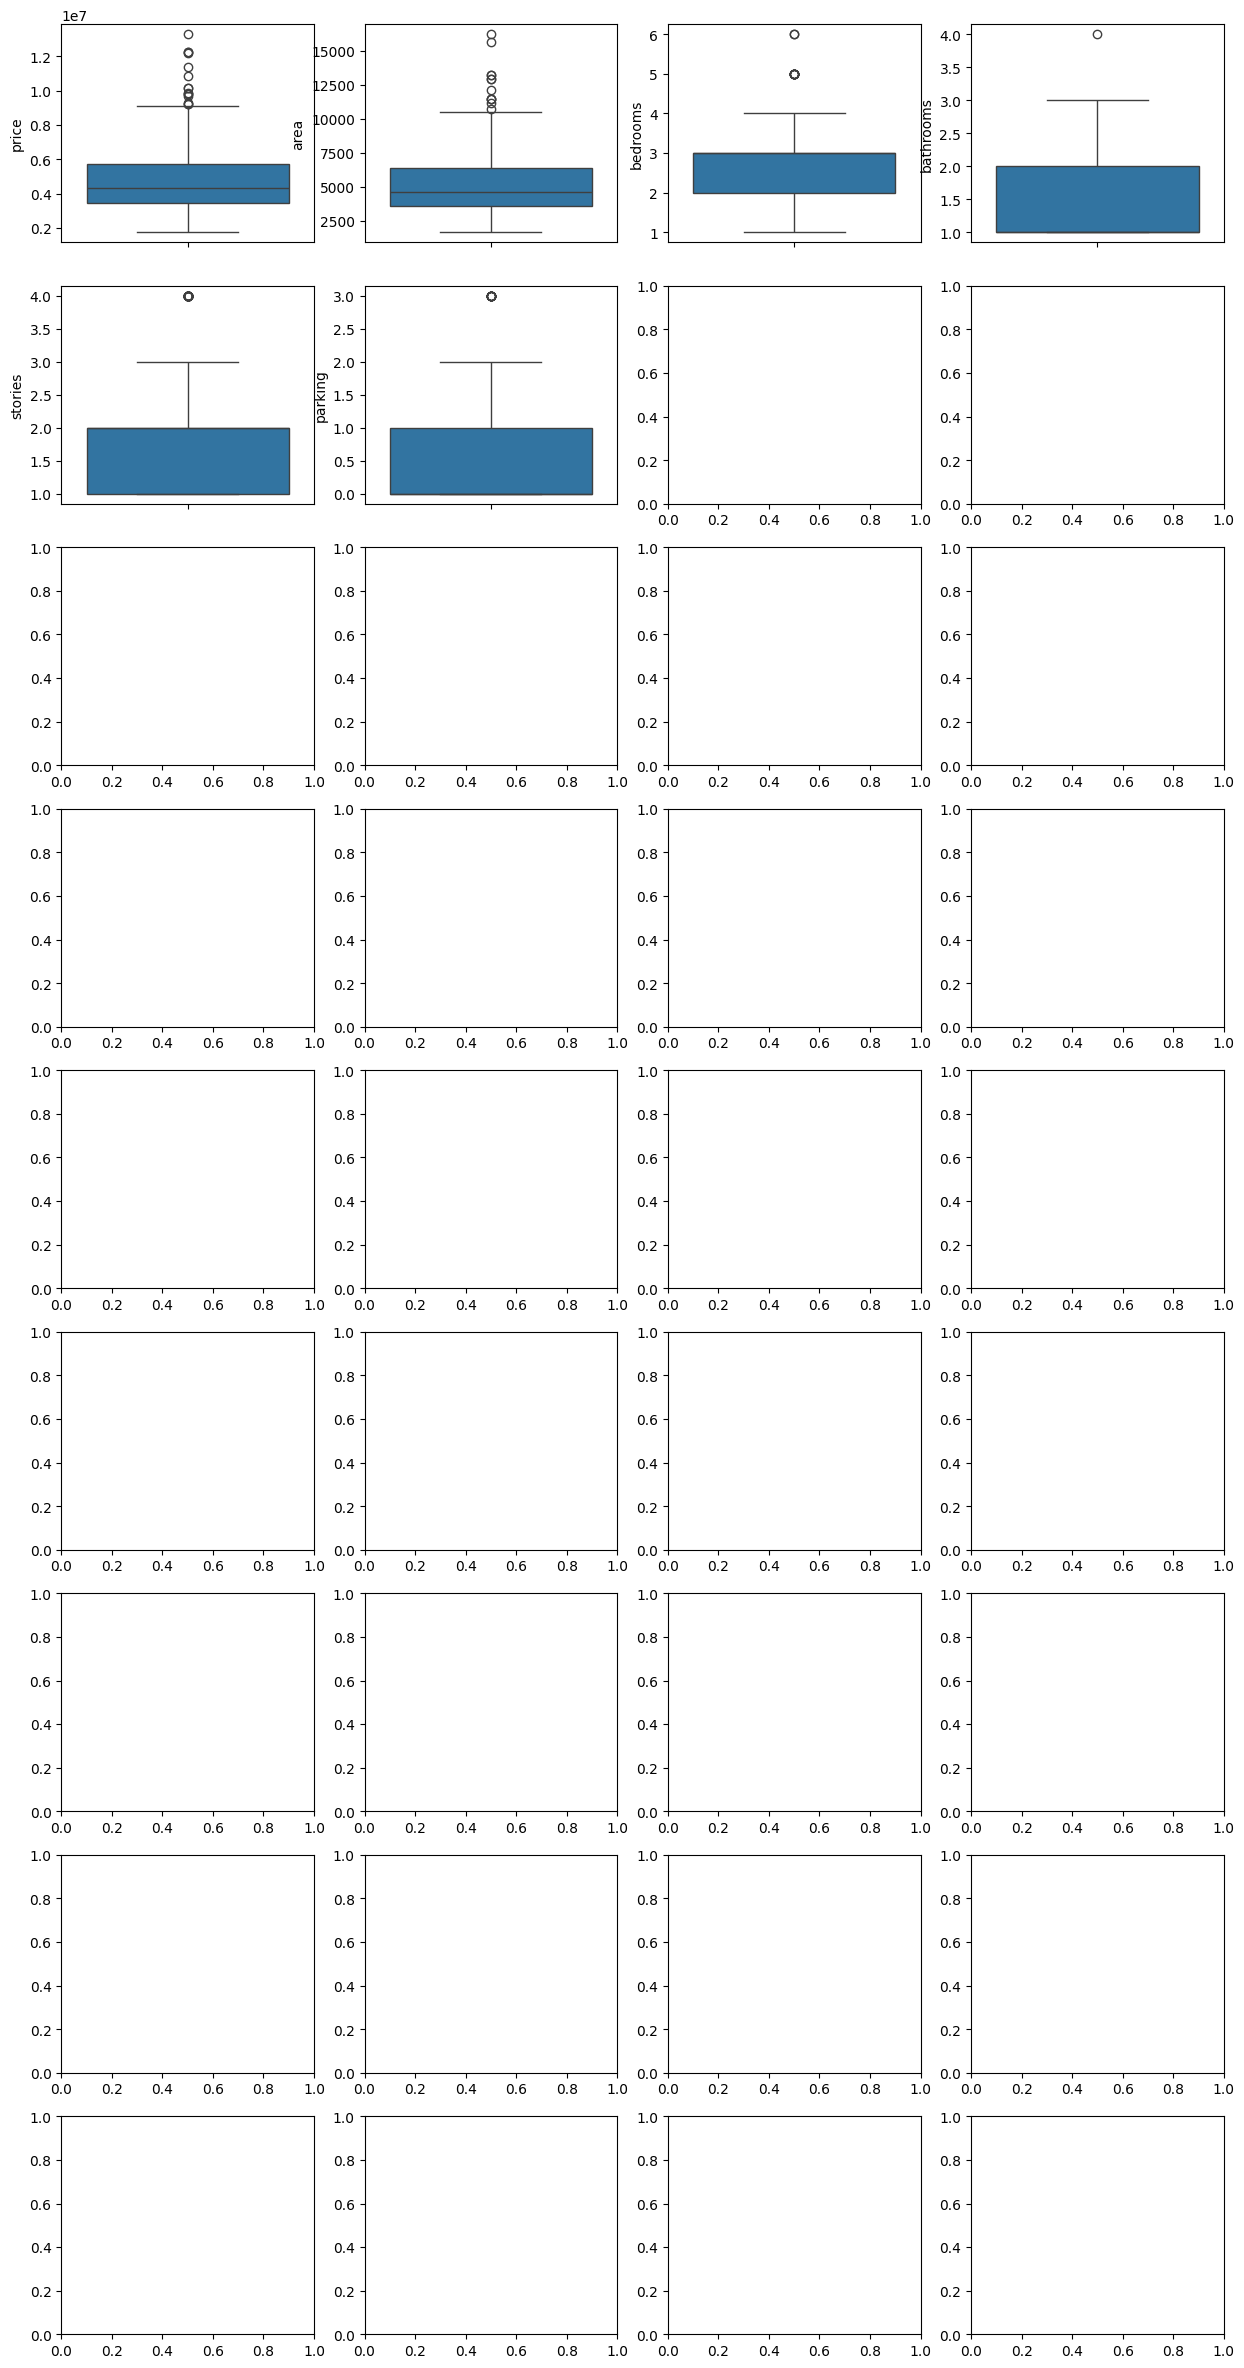

In [161]:
# select the columns to be plotted
cols = data2.columns

# create the figure and axes
fig, axes = plt.subplots(9, 4)
axes = axes.ravel()  # flattening the array makes indexing easier
fig.set_size_inches(15, 30)  # ( x , y )
for col, ax in zip(cols, axes):
    sns.boxplot(ax =ax,y=data2[col])

plt.show()

Next, we try to handel the outliers.<br>
We can do this by invoking the quantile() method on the DataFrame and then filtering based on the knowledge of the quantiles for each attribute.
The cutoff for outliers is more than 3/2 of the upper quartile and less than 3/2 of the lowetr quartile. 

In [163]:
# numeric columns only (data2 should already be numeric)
num_cols = data2.select_dtypes(include="number").columns

# compute 0.999 quantile for numeric columns only
high_quant = data2[num_cols].quantile(0.999)

# drop rows with extreme high outliers (any numeric col above its 0.999 quantile)
mask = (data2[num_cols] > high_quant).any(axis=1)
data2 = data2.loc[~mask].copy()

print("Rows after removing extreme outliers:", data2.shape[0])


Rows after removing extreme outliers: 542


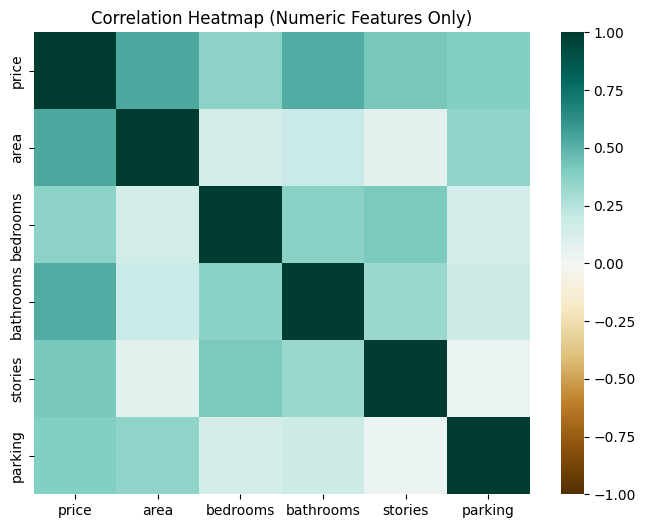

In [165]:
# Use numeric columns only for correlation
corr = data.select_dtypes(include="number").corr()

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, cmap="BrBG")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


Top features with correlation greater than .5 with sale-price

In [167]:
# Clean column names
data.columns = data.columns.str.strip()

# Try to automatically detect target column
possible_targets = [col for col in data.columns if "price" in col.lower() or "value" in col.lower()]

if len(possible_targets) > 0:
    target_col = possible_targets[0]
    print(f"Using '{target_col}' as target column.")
else:
    # fallback → use last numeric column
    target_col = data.select_dtypes(include="number").columns[-1]
    print(f"No price/value column found. Using '{target_col}' as fallback target.")


Using 'price' as target column.


OverallQual is highly correlated with target feature of saleprice by near 80%

From the listing above we can identify which features have most impact on the Sale Price.
We can also use joint distribution to look for a relationship between all of the possible pairs, two at a time. This can be done by using pairplot()from sns. 
We will use the most promissing features for the pairplot.

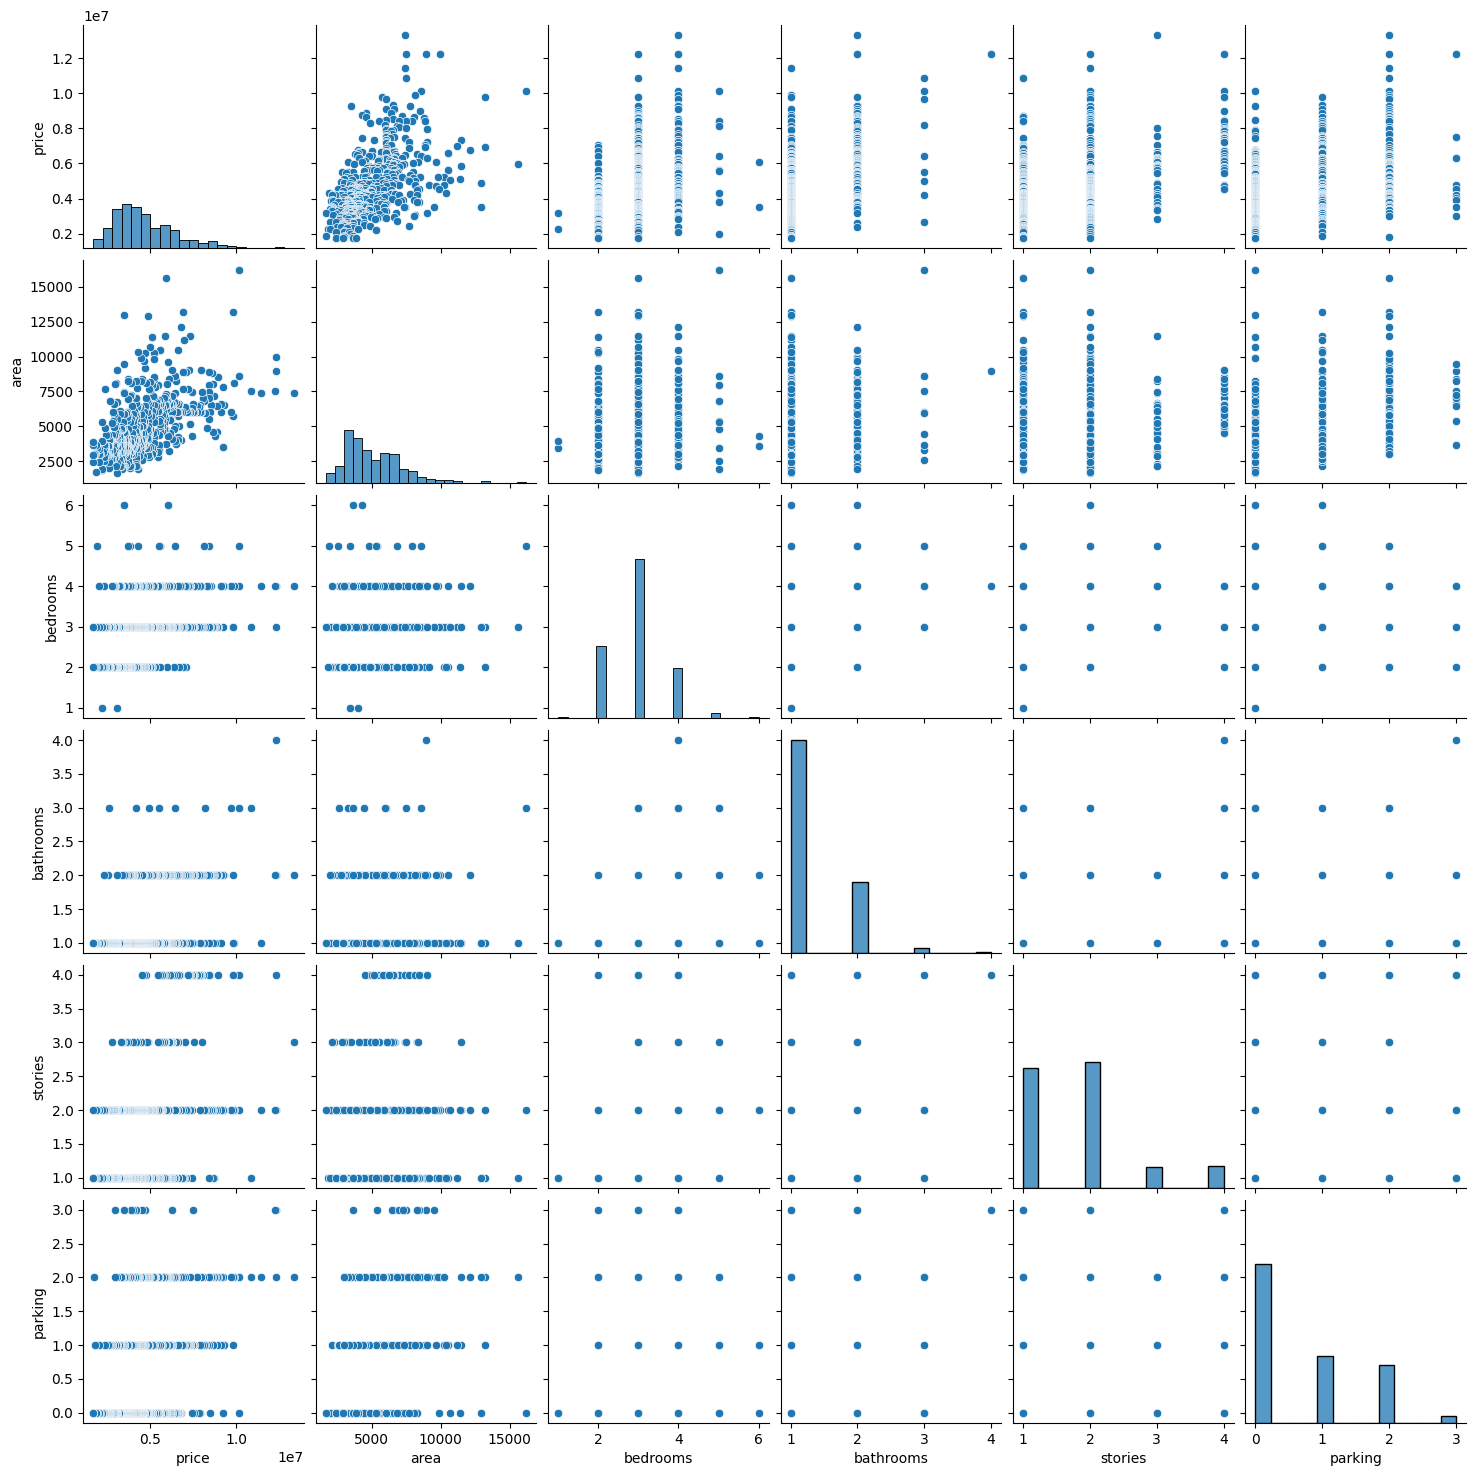

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ["price", "area", "bedrooms", "bathrooms", "stories", "parking"]
cols = [c for c in cols if c in data.columns]  # safety

sns.pairplot(data[cols])
plt.show()


we can clearly see how with an increase in GrLivArea the price increases as well.
In order to train our model, let’s look at other types of plots that can make the relationship for the highest correlated variables. The OverallQual, with the target variable, SalePrice, does standout.
Let’s see what the barplot() and boxplot() methods give us.


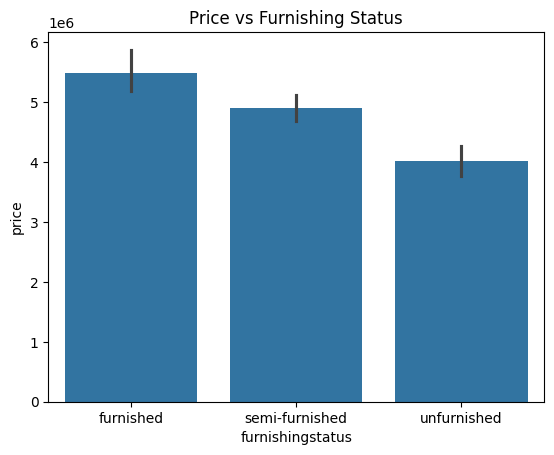

In [187]:
sns.barplot(x=data["furnishingstatus"], y=data["price"])
plt.title("Price vs Furnishing Status")
plt.show()


<Figure size 1800x800 with 0 Axes>

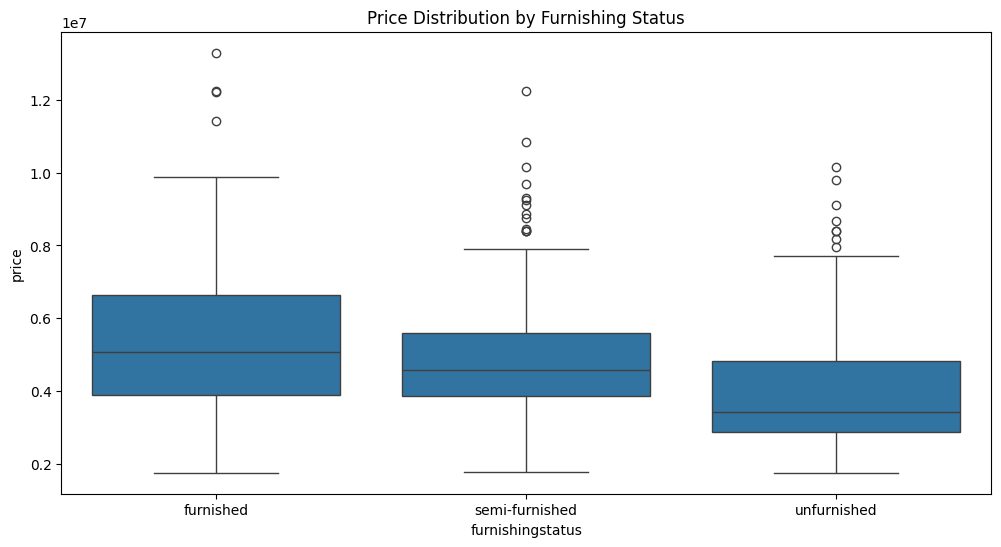

In [191]:
plt.figure(figsize=(12,6))
sns.boxplot(x=data["furnishingstatus"], y=data["price"])
plt.title("Price Distribution by Furnishing Status")
plt.show()


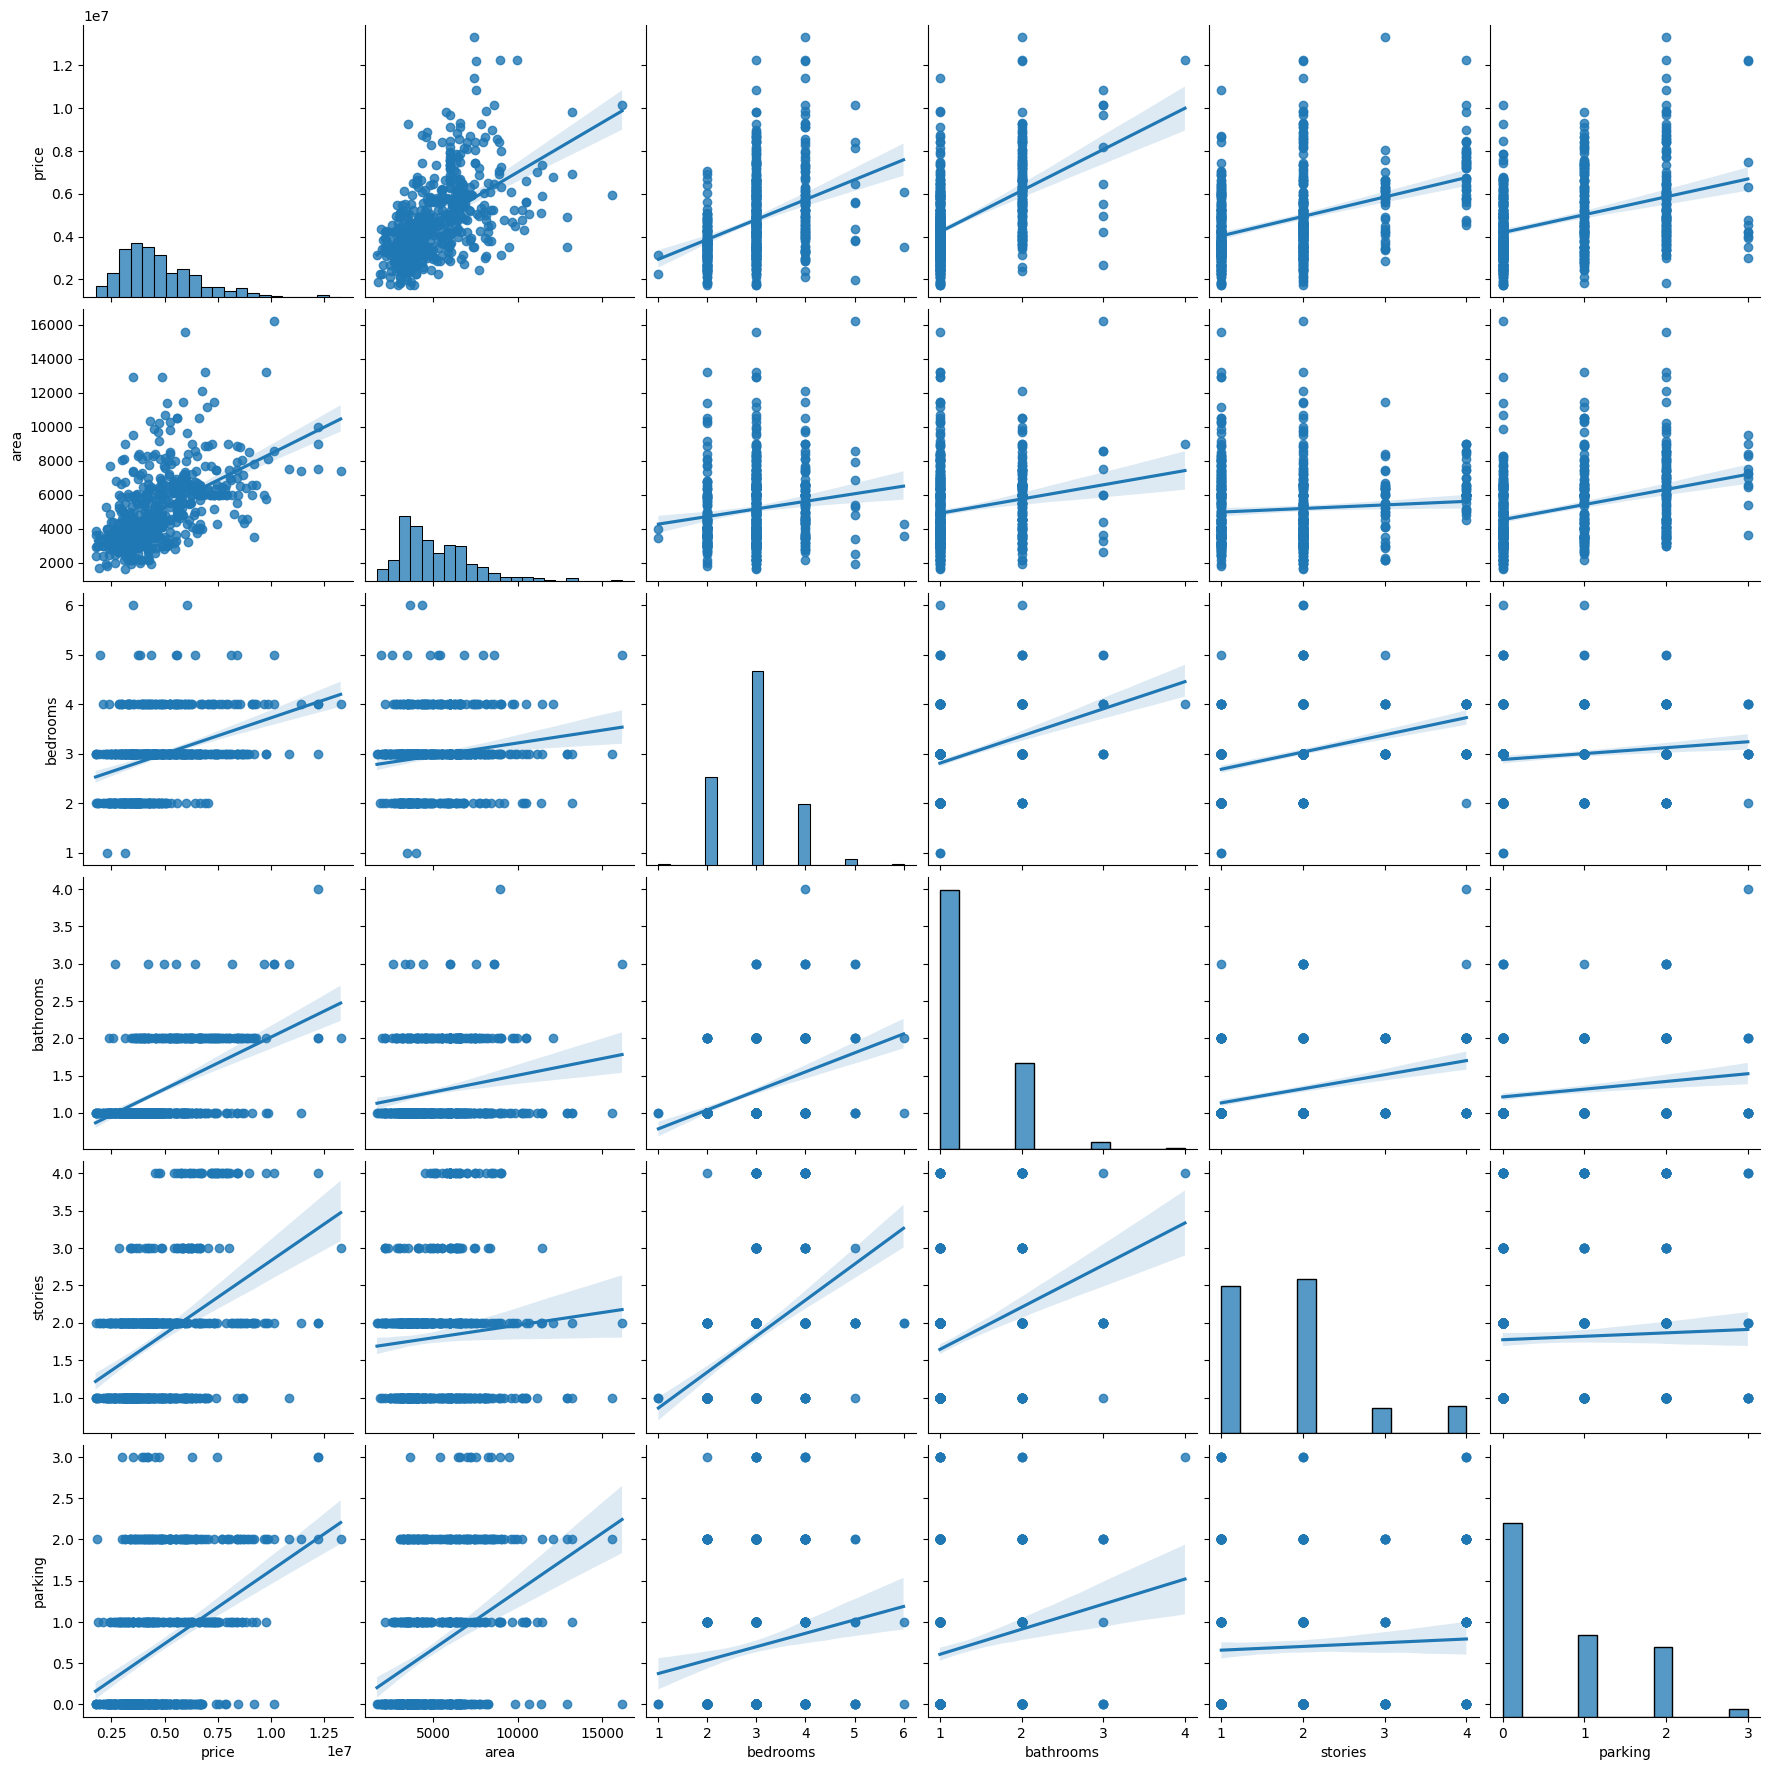

In [195]:
# Use columns that exist in Housing.csv
cols = ["price", "area", "bedrooms", "bathrooms", "stories", "parking"]
cols = [c for c in cols if c in data.columns]  # safety

sns.pairplot(data[cols], height=3, kind="reg")
plt.show()

In [199]:
print("Most positively correlated features with the target (price)")

# Correlation on numeric columns
corr = data.select_dtypes(include="number").corr()

# Sort by correlation with 'price'
corr_sorted = corr["price"].sort_values(ascending=False)
corr_sorted


Most positively correlated features with the target (price)


price              1.000000
area               0.535997
bathrooms          0.517545
airconditioning    0.452954
stories            0.420712
parking            0.384394
bedrooms           0.366494
prefarea           0.329777
mainroad           0.296898
guestroom          0.255517
basement           0.187057
hotwaterheating    0.093073
Name: price, dtype: float64

Clearly a strong positive corrolation exits between the OverallQual attribute and SalePrice. notice that at higher qualities there is much higher variability in prices.
From our correlations list, we also know that GarageArea and GarageCars both also have a high correlation with price, but do we need both? only one should be sufficient for modeling purposes

In [201]:
threshold = 0.5
important_corrs = (corr[abs(corr) > threshold][corr != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])

# Sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

unique_important_corrs 

,attribute pair,correlation
0,"(area, price)",0.535997
1,"(bathrooms, price)",0.517545


We can see that we have many highly correlated attributes. Later, we are going to drop the highly correlated variables. We will also drop the attributes that have almost no correlation with price, like MoSold, 3SsnPorch and BsmtFinSF2.
Now let's explore categorical attributes The categorical attributes are:


In [203]:
data.select_dtypes(include=['object']).columns

Index(['furnishingstatus'], dtype='object')

No duplicate rows

In [205]:
data.duplicated().sum()

0

In [215]:
# Create features (X) and target (y)
X = data.drop(columns=["price"])
y = data["price"]

print("X shape:", X.shape)
print("y shape:", y.shape)
X.head()



X shape: (545, 12)
y shape: (545,)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,7420,4,1,2,1,1,1,0,1,2,0,furnished


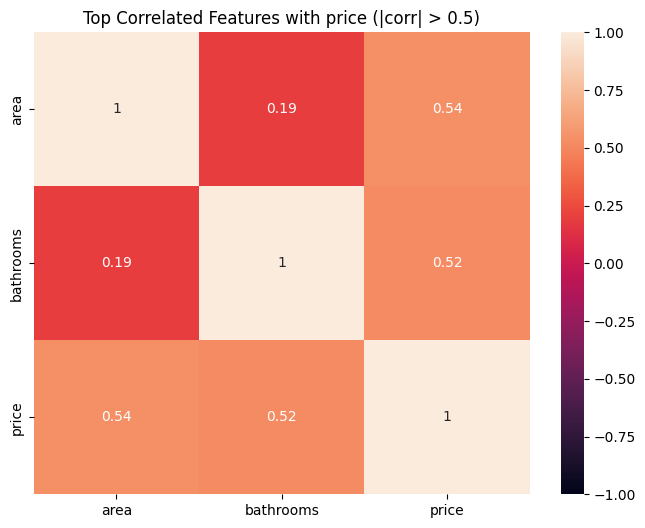

Top features: ['area', 'bathrooms']


In [223]:
# correlation on numeric columns
corr = data.select_dtypes(include="number").corr()

# features strongly correlated with target 'price'
top_feature = corr.index[(corr["price"].abs() > 0.5) & (corr.index != "price")]

plt.figure(figsize=(8, 6))
top_corr = data[list(top_feature) + ["price"]].corr()
sns.heatmap(top_corr, annot=True, vmin=-1, vmax=1)
plt.title("Top Correlated Features with price (|corr| > 0.5)")
plt.show()

print("Top features:", list(top_feature))


Handle Text And Categorical Attributes. A common approach to deal with textual data is to create one binary attribute for each category of the feature.<br>
This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are also known as dummy attributes. Scikit-Learn provides a OneHotEncoder class to convert categorical values into one-hot vectors


In [225]:
#### Transforming Cat variables
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_processed_1hot = cat_encoder.fit_transform(data)
housing_processed_1hot  # We have a 1422x7333 matrix which is mostly sparse (zeros).

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7085 stored elements and shape (545, 536)>

Going back to distribution plots, we notice that LotArea ranges from 0 to 200000, while GarageCars ranges only from 0 to 4. min-max scaling and standardization.<br>



As noted there a seuence of tranformtaion that must consecutively be applied to the transformation. Scikit-Learn provides the Pipeline class to help with such sequences of transformations.

We are going to create a transformation pipeline based on SimpleImputer(*) and StandardScalar classes for the numerical attributes and OneHotEncoder for dealing with categorical attributes.<br>
Scikit-Learn provides a very handy class, SimpleImputer to take care of missing values. You just tell it the type of imputation, e.g. by median, and voila, the job is done. <br>
First, we will look at a simple example pipeline to impute and scale numerical attributes. Then we will create a full pipeline to handle both numerical and categorical attributes in one go.

In [231]:
# Import modules
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Separate features and target variable
housing_X = data.drop("price", axis=1)
housing_y = data["price"].copy()

# Get the list of names for numerical and categorical attributes separately
num_attributes = housing_X.select_dtypes(exclude='object')
cat_attributes = housing_X.select_dtypes(include='object')

num_attribs = list(num_attributes)
cat_attribs = list(cat_attributes)

# Numerical Pipeline to impute any missing values with the median and scale attributes
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

print("housing_X shape:", housing_X.shape)
print("housing_y shape:", housing_y.shape)
housing_X.head()


housing_X shape: (545, 12)
housing_y shape: (545,)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,7420,4,1,2,1,1,1,0,1,2,0,furnished


So far, we have handled categorical and numerical attributes separately. It is more convenient and clean to have a single transformer handle all columns, applying the appropriate transformations to each column. Scikit-Learn comes to the rescue again by providing the ColumnTransformer for the very purpose.

In [233]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])


# Description before applying transforms
print(housing_y.describe())

# Apply log-transform to SalePrice
housing_y_prepared  = np.log(housing_y)

# Run the transformation pipeline on all the other attributes
housing_X_prepared = full_pipeline.fit_transform(housing_X)

# Description after applying transforms
print(housing_y_prepared.describe())

housing_X_prepared

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64
count    545.000000
mean      15.306987
std        0.372165
min       14.375126
25%       15.048071
50%       15.283385
75%       15.562970
max       16.403275
Name: price, dtype: float64


array([[ 1.04672629,  1.40341936,  1.42181174, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.75700953,  1.40341936,  5.40580863, ...,  1.        ,
         0.        ,  0.        ],
       [ 2.21823241,  0.04727831,  1.42181174, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, ...,  0.        ,
         0.        ,  1.        ],
       [-1.03338891,  0.04727831, -0.57018671, ...,  1.        ,
         0.        ,  0.        ],
       [-0.5998394 ,  0.04727831, -0.57018671, ...,  0.        ,
         0.        ,  1.        ]])

In [235]:
type(housing_X_prepared)

numpy.ndarray

The housing_X_prepared is a scipy csr matrix. If desired, we can convert tp dataframe as follows.

In [239]:
housing_X_prepare2 = pd.DataFrame(housing_X_prepared)


In [241]:
print(housing_X_prepare2.describe())

                 0             1             2             3             4   \
count  5.450000e+02  5.450000e+02  5.450000e+02  5.450000e+02  5.450000e+02   
mean  -1.564498e-16 -1.825247e-16 -2.607496e-17 -1.303748e-16 -1.825247e-16   
std    1.000919e+00  1.000919e+00  1.000919e+00  1.000919e+00  1.000919e+00   
min   -1.614530e+00 -2.665004e+00 -5.701867e-01 -9.293967e-01 -2.465344e+00   
25%   -7.151451e-01 -1.308863e+00 -5.701867e-01 -9.293967e-01  4.056229e-01   
50%   -2.539222e-01  4.727831e-02 -5.701867e-01  2.244101e-01  4.056229e-01   
75%    5.578300e-01  4.727831e-02  1.421812e+00  2.244101e-01  4.056229e-01   
max    5.096263e+00  4.115701e+00  5.405809e+00  2.532024e+00  4.056229e-01   

                 5             6             7             8           9   \
count  5.450000e+02  5.450000e+02  5.450000e+02  5.450000e+02  545.000000   
mean   5.214993e-17 -7.822489e-17 -6.518741e-18 -5.214993e-17    0.000000   
std    1.000919e+00  1.000919e+00  1.000919e+00  1.000919

Create and Assess Machine Learning Models<br>
First we need to create a test set,  the most common approach is to pick some instances randomly, typically 20% of the dataset, and set them aside. The simplest function for doing this Scikit-learn’s train_test_split().

In [243]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing_X_prepared, housing_y_prepared, test_size=0.2, random_state=7)

Say we want to create a Linear Regression model. In general, this is what it looks like:

In [245]:
from sklearn.linear_model import LinearRegression

# Train the model on training data
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on test data
print("Accuracy%:", model.score(X_test, y_test)*100)

Accuracy%: 69.38780801517255


Since we are dealing with a regression problem, we are also going to use RMSE as the main performance measure to assess the quality of our models.<br>

Since we took the log of our target variable, SalePrice. This means that before evaluating RMSE, we need to convert prices back to their original values. Inverse of the log means to simply take the exponential of the log values, i.e., we will simply call np.exp().we are going to write a function as a good coding practice, like so: def inv_y(y):
    return np.exp(y)

In [255]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import sys
!{sys.executable} -m pip install xgboost
import warnings

warnings.filterwarnings('ignore')

# Invert the log-transformed value
def inv_y(transformed_y):
    return np.exp(transformed_y)

# Series to collect RMSE for the different algorithms: "algorithm name + rmse"
rmse_compare = pd.Series()
rmse_compare.index.name = 'Model'

# Series to collect accuracy scores for the different algorithms: "algorithm name + score"
scores_compare = pd.Series()
scores_compare.index.name = 'Model'

# Model 1: Linear Regression =================================================
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_val_predictions = linear_model.predict(X_test)
linear_val_rmse = mean_squared_error(inv_y(linear_val_predictions), inv_y(y_test))
linear_val_rmse = np.sqrt(linear_val_rmse)
rmse_compare['LinearRegression'] = linear_val_rmse

lr_score = linear_model.score(X_test, y_test)*100
scores_compare['LinearRegression'] = lr_score

# Model 2: Decision Trees. Define the model. =============================
dtree_model = DecisionTreeRegressor(random_state=5)
dtree_model.fit(X_train, y_train)

dtree_val_predictions = dtree_model.predict(X_test)
dtree_val_rmse = mean_squared_error(inv_y(dtree_val_predictions), inv_y(y_test))
dtree_val_rmse = np.sqrt(dtree_val_rmse)
rmse_compare['DecisionTree'] = dtree_val_rmse

dtree_score = dtree_model.score(X_test, y_test)*100
scores_compare['DecisionTree'] = dtree_score

# Model 3: Random Forest. Define the model. =============================
rf_model = RandomForestRegressor(random_state=5)
rf_model.fit(X_train, y_train)

rf_val_predictions = rf_model.predict(X_test)
rf_val_rmse = mean_squared_error(inv_y(rf_val_predictions), inv_y(y_test))
rf_val_rmse = np.sqrt(rf_val_rmse)
rmse_compare['RandomForest'] = rf_val_rmse

rf_score = rf_model.score(X_test, y_test)*100
scores_compare['RandomForest'] = rf_score

# Model 4: Gradient Boosting Regression ==========================================
gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, 
                                      max_depth=4, random_state=5)
gbr_model.fit(X_train, y_train)

gbr_val_predictions = gbr_model.predict(X_test)
gbr_val_rmse = mean_squared_error(inv_y(gbr_val_predictions), inv_y(y_test))
gbr_val_rmse = np.sqrt(gbr_val_rmse)
rmse_compare['GradientBoosting'] = gbr_val_rmse

gbr_score = gbr_model.score(X_test, y_test)*100
scores_compare['GradientBoosting'] = gbr_score

We have trained four different models. As you can see, training from one model to another just means that you just select a different one from Scikit-Learn’s library and change a single line of code!

Comparative analysis of the models and their errors. Now let’s get the performance measures for our models in sorted order, from best to worst:

In [257]:
print('RMSE values for different algorithms:')
rmse_compare.sort_values(ascending=True).round()

RMSE values for different algorithms:


Model
LinearRegression    1082096.0
RandomForest        1201471.0
GradientBoosting    1242402.0
DecisionTree        1380331.0
dtype: float64

In [259]:
print('Accuracy scores for different algorithms:')
scores_compare.sort_values(ascending = False).round(3)

Accuracy scores for different algorithms:


Model
LinearRegression    69.388
RandomForest        63.176
GradientBoosting    61.380
DecisionTree        40.555
dtype: float64

A large prediction error usually means an example of a model underfitting the training data. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. The main ways to fix underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model.<br>
In this case, we have trained more powerful models, capable of finding complex nonlinear relationships in the data, like a DecisionTreeRegressor as well. However, the more powerful model seems to be performing worse! The Decision Tree model is overfitting badly enough to perform even worse than the simpler Linear Regression model.<br>
Possible solutions to deal with overfitting are to simplify the model, constrain it, or get more training data.<br>
Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. Building a model on top of many other models is called Ensemble Learning, and it is used to improve the performance of the algorithms. In fact, we can see that Random Forests are performing much better than Decision Trees.

Evaluation Using Cross-Validation<br>
One way to evaluate models is to split the training set into a smaller training set and a validation set, then train the models against the smaller training set and evaluate them against the validation set. This is called cross-validation. We can use Scikit-Learn’s cross-validation feature, cross_val_score, for this.<br>
Let’s perform a K-fold cross-validation on our best model: the cross-validation function randomly splits the training set into K distinct subsets or folds, then it trains and evaluates the model K times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the K evaluation scores:

In [261]:
from sklearn.model_selection import cross_val_score

# Perform K fold cross-validation, where K=10
scores = cross_val_score(linear_model, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
linear_rmse_scores = np.sqrt(-scores)

# Display results
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(linear_rmse_scores)

Scores: [0.2529775  0.20149493 0.19501564 0.16995514 0.19627603 0.21055809
 0.23852797 0.16870265 0.22141337 0.2342822 ]
Mean: 0.20892035238300938
Standard deviation: 0.026765150438529135


Scikit-learn models can be saved easily using the pickle module, or using sklearn.externals.joblib, which is more efficient at serializing large NumPy arrays:

from sklearn.externals import joblib

Save model
joblib.dump(my_model, "my_model.pkl")

Load saved model
my_model_loaded = joblib.load("my_model.pkl")